In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt1000_s1.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-5.787849e-12,-3.809566e-12,0.079485,0.251740,0.003501,-0.000443,2.798463,-1.189741e-09,-6.785263e-10,...,-5.748169e-09,5.639626e-09,-1.089596e-09,1.151854e-09,0.336436,-0.941706,-0.992651,0.121015,-0.441498,0.897262
1,1,4.762345e-04,-2.296717e-04,0.078762,0.245766,-0.010599,0.002673,2.736494,7.956330e-02,-3.613606e-02,...,-7.902037e-02,-9.500237e-02,4.432593e-02,-2.662716e-01,0.394110,-0.919063,-0.992651,0.121015,-0.446128,0.894969
2,2,1.820449e-03,-7.476358e-04,0.078116,0.232195,-0.046231,0.011576,2.582492,1.729183e-01,-5.738907e-02,...,-1.296035e-01,-1.784818e-01,1.017945e-01,-4.902356e-01,0.530424,-0.847732,-0.992651,0.121015,-0.461184,0.887305
3,3,3.864890e-03,-1.293891e-03,0.076800,0.217872,-0.093335,0.025344,2.384105,2.263954e-01,-4.924149e-02,...,-1.165579e-01,-2.033400e-01,1.379186e-01,-5.448191e-01,0.687098,-0.726565,-0.992651,0.121015,-0.485852,0.874041
4,4,6.296569e-03,-1.703653e-03,0.074273,0.207454,-0.143245,0.042025,2.179233,2.571195e-01,-3.328381e-02,...,-8.454384e-02,-2.088864e-01,1.579860e-01,-5.469835e-01,0.820543,-0.571585,-0.992651,0.121015,-0.513163,0.858291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-6.530343e+00,-1.260967e+00,0.075971,2.641032,1.055191,-3.027039,-21.731644,3.007629e-01,-1.376215e-01,...,-1.585789e-01,1.644759e-01,6.840092e-02,2.580170e-02,-0.256602,-0.966517,-0.847789,-0.530334,-0.010367,-0.999946
3996,3996,-6.527475e+00,-1.262383e+00,0.075893,2.684470,1.019478,-3.055379,-21.721207,2.720936e-01,-1.449462e-01,...,-1.493706e-01,1.519718e-01,8.328369e-02,3.274799e-02,-0.266675,-0.963786,-0.847789,-0.530334,0.038114,-0.999273
3997,3997,-6.524882e+00,-1.263869e+00,0.075656,2.722152,0.985818,-3.076236,-21.707970,2.475997e-01,-1.522024e-01,...,-1.471240e-01,1.431505e-01,9.715374e-02,3.865223e-02,-0.279409,-0.960172,-0.847789,-0.530334,0.087443,-0.996170
3998,3998,-6.522468e+00,-1.265451e+00,0.075268,2.757825,0.954010,-3.093489,-21.697182,2.355171e-01,-1.631254e-01,...,-1.545964e-01,1.305383e-01,1.050703e-01,2.157704e-02,-0.289751,-0.957102,-0.847789,-0.530334,0.137530,-0.990498


(4000, 45)

Text(0.5, 0, 'Time (s)')

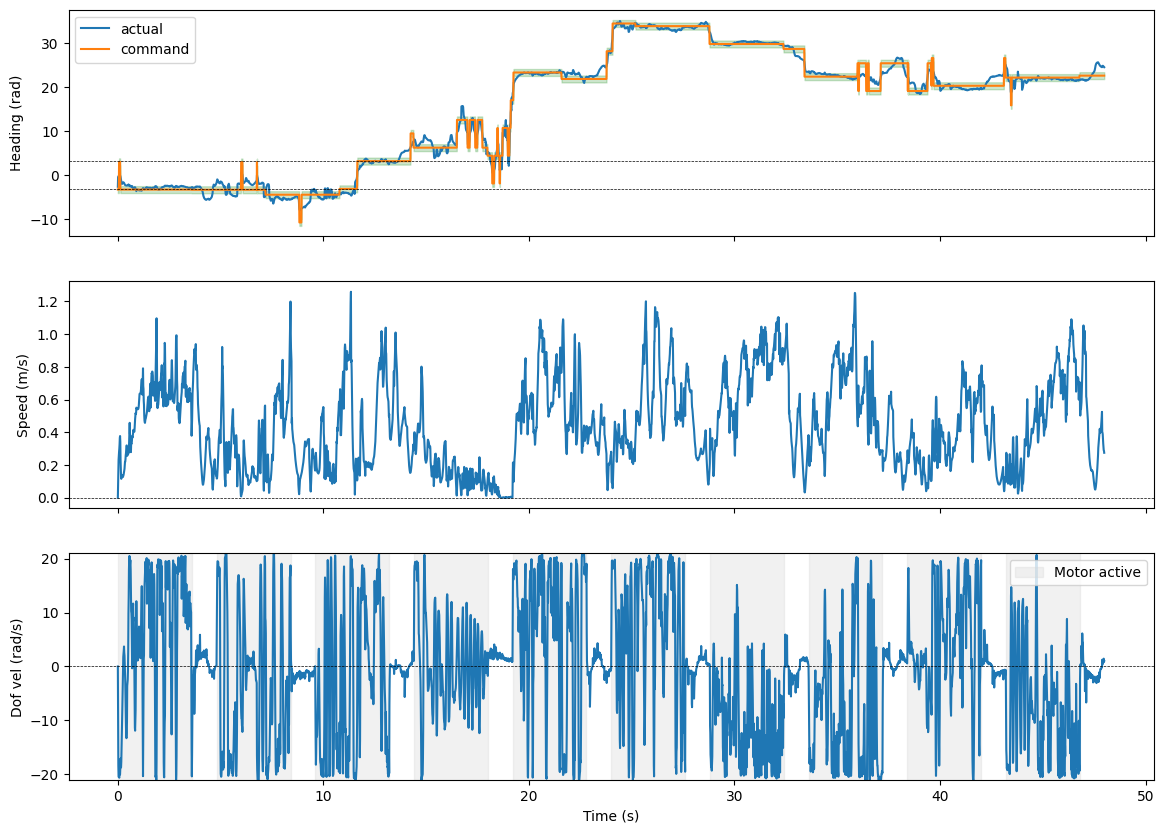

In [33]:
dt = 0.012
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

heading = np.unwrap(heading)
diff = heading - des_heading
wrapped_diff = (diff+np.pi)//(2*np.pi)
# Add the wrapped difference back to angle2
des_heading = des_heading + wrapped_diff*2*np.pi

fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()

axs[0].fill_between(np.arange(len(df))*dt, des_heading-np.pi/4, des_heading+np.pi/4, alpha=0.2, color='g')




axs[1].plot(np.arange(len(df))*dt, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*dt, df['action'])
# axs[2].plot(np.arange(len(df))*dt, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

/tmp/ipykernel_1690478/1686562230.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(1.5155693348043728, 2000)

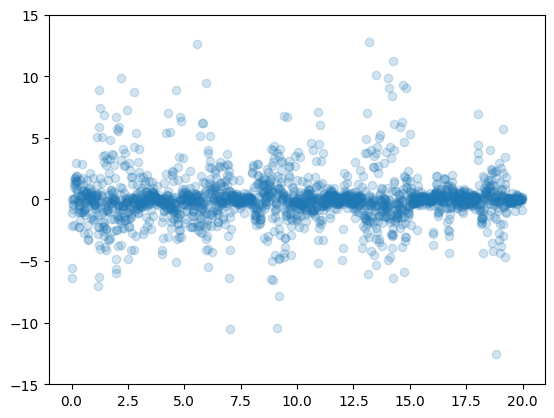

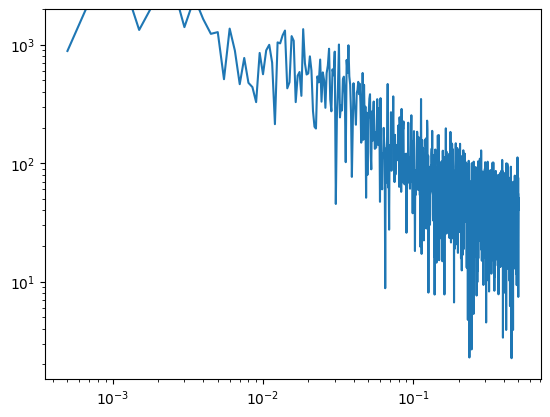

In [21]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*0.01, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

